In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from PIL import Image, ImageDraw, ImageFont
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [93]:
import numpy as np 
import pandas as pd 
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU,SimpleRNN
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from tensorflow.keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from tensorflow.keras.preprocessing import sequence, text
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
# dataset link: https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data

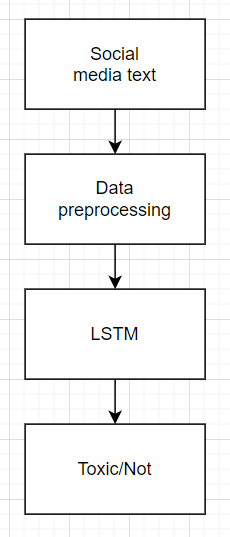

In [79]:
df_ = pd.read_csv(r'train.csv')

In [10]:
df_.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [12]:
toxic_rows = df_[(df_['toxic'] == 1) | (df_['severe_toxic'] == 1) | (df_['obscene'] == 1) | 
                (df_['threat'] == 1) | (df_['insult'] == 1) | (df_['identity_hate'] == 1)]

random_sample1 = toxic_rows.sample(n=1000, random_state=42)

In [13]:
non_toxic_rows = df_[(df_['toxic'] == 0) & (df_['severe_toxic'] == 0) & (df_['obscene'] == 0) | 
                (df_['threat'] == 0) & (df_['insult'] == 0) & (df_['identity_hate'] == 0)]


random_sample2 = non_toxic_rows.sample(n=2000, random_state=42) 

In [14]:
df_2 = pd.concat([random_sample1 ,random_sample2]).drop_duplicates()

In [15]:
df_2.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
45045,786d8ca9b0bad3cc,"""\nI was talking about them running any check ...",1,0,0,0,0,0
27198,47f18388952e3ee7,White Trash\nFuck off you white piece of trash...,1,1,1,0,1,1
16664,2bf361b9a8eb1ba5,eat shit get rid of goofs you queers.,1,0,1,0,1,0
8158,15b6fd032e614001,DUMB ASSES\nIt's was my sockpuppet...joe hazet...,1,0,0,0,0,0
142212,f8b05b9ae771fb50,"Are all professors of rhetoric pompous, self-c...",1,0,1,0,1,0


In [16]:
df_2 = df_2.reset_index(drop=True)

In [17]:
df_2.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,786d8ca9b0bad3cc,"""\nI was talking about them running any check ...",1,0,0,0,0,0
1,47f18388952e3ee7,White Trash\nFuck off you white piece of trash...,1,1,1,0,1,1
2,2bf361b9a8eb1ba5,eat shit get rid of goofs you queers.,1,0,1,0,1,0
3,15b6fd032e614001,DUMB ASSES\nIt's was my sockpuppet...joe hazet...,1,0,0,0,0,0
4,f8b05b9ae771fb50,"Are all professors of rhetoric pompous, self-c...",1,0,1,0,1,0


In [ ]:
## let's build thw model

In [33]:
df_2['labels'] = df_2[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values.tolist()

In [34]:
df_2['labels'].head()

0    [1, 0, 0, 0, 0, 0]
1    [1, 1, 1, 0, 1, 1]
2    [1, 0, 1, 0, 1, 0]
3    [1, 0, 0, 0, 0, 0]
4    [1, 0, 1, 0, 1, 0]
Name: labels, dtype: object

In [11]:
# Train-test split
train_texts, val_texts, train_labels, val_labels = train_test_split(df_2['comment_text'].values, df_2['labels'].values, test_size=0.2)


In [15]:
train_dataset = ToxicCommentDataset(train_texts, train_labels, tokenizer, max_len=128*4)
val_dataset = ToxicCommentDataset(val_texts, val_labels, tokenizer, max_len=128)

In [6]:
# tokenization

In [42]:
maxlen = 100  
embedding_dim = 100  
vocab_size = 5000  

# Tokenizing the text data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df_2["comment_text"])
sequences = tokenizer.texts_to_sequences(df_2["comment_text"])

# Padding sequences to ensure consistent input size
X = pad_sequences(sequences, maxlen=maxlen)
y = np.array(df_2["labels"])


In [72]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

embedding_matrix = np.random.randn(vocab_size, embedding_dim)  



In [96]:

model = Sequential()
model.add(Embedding(vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=maxlen, trainable=True))
model.add(LSTM(units=128))  
model.add(Dense(6, activation="sigmoid")) 

In [54]:
y_train[20]

[1, 0, 1, 0, 1, 0]

In [74]:
tensor_list = [torch.from_numpy(np.array(item)) for item in y_train]
y_train2 = torch.stack(tensor_list)

In [75]:
tensor_list = [torch.from_numpy(np.array(item)) for item in y_val]
y_val2 = torch.stack(tensor_list)

In [76]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_val = tf.convert_to_tensor(X_val, dtype=tf.float32)


In [82]:
y_train2 = convert(y_train2)

In [83]:
y_val2 = convert(y_val2)

In [85]:
y_val2.shape

TensorShape([600, 6])

In [86]:
y_train2.shape

TensorShape([2396, 6])

In [81]:

def convert(y0):
    
    pytorch_tensor = y0
    
    numpy_array = pytorch_tensor.numpy()

    tensorflow_tensor = tf.convert_to_tensor(numpy_array)

    return tensorflow_tensor


In [97]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train2, epochs=7, batch_size=32, validation_data=(X_val, y_val2))


Epoch 1/7
75/75 [==============================] - 10s 108ms/step - loss: 0.3475 - accuracy: 0.9182 - val_loss: 0.3016 - val_accuracy: 0.9683
Epoch 2/7
75/75 [==============================] - 7s 97ms/step - loss: 0.2459 - accuracy: 0.9800 - val_loss: 0.2657 - val_accuracy: 0.9650
Epoch 3/7
75/75 [==============================] - 7s 98ms/step - loss: 0.2038 - accuracy: 0.9795 - val_loss: 0.2573 - val_accuracy: 0.9617
Epoch 4/7
75/75 [==============================] - 7s 100ms/step - loss: 0.1708 - accuracy: 0.9741 - val_loss: 0.2663 - val_accuracy: 0.9600
Epoch 5/7
75/75 [==============================] - 7s 100ms/step - loss: 0.1444 - accuracy: 0.9720 - val_loss: 0.2496 - val_accuracy: 0.9567
Epoch 6/7
75/75 [==============================] - 8s 100ms/step - loss: 0.1193 - accuracy: 0.9541 - val_loss: 0.2714 - val_accuracy: 0.9483
Epoch 7/7
75/75 [==============================] - 7s 98ms/step - loss: 0.0986 - accuracy: 0.9453 - val_loss: 0.2766 - val_accuracy: 0.9083


In [94]:
output_map = {
0: "toxic"	, 1:"severe_toxic",	2:"obscene"	, 3:"threat", 4:"insult", 5:"identity_hate"
}

In [114]:
# let consider a datapoint
test_ = "you are waste"

In [125]:
predict_ = model.predict(test_)

19/19 [==============================] - 1s 46ms/step


In [120]:
predict_[0]

array([0.2316409 , 0.00212604, 0.09305762, 0.00138757, 0.03730922,
       0.01351762], dtype=float32)

In [121]:
max = 0
class_ = 0
for i in predict_[0]:
    if max > i:
        max = int(max)
    class_ +=1
    

In [126]:
predicted_class_names = output_map[max]
print(predicted_class_names)

toxic


In [116]:
test_ = X_val